In [1]:
import torchaudio
import torch
import matplotlib.pyplot as plt

In [2]:
total_duration = 30
clip_len = 3 #length of clip to visualise in seconds. Modify as you wish

In [4]:
#audio file to load. Experiment with different audio clips.
data, sr = torchaudio.load('ADL_DCASE_DATA/development/audio/a001_0_30.wav') 

In [5]:
#create spectrogram function. Params currently match the paper. 
#You might want to play around with these and see how they change the representation
win_size = int(round(40 * sr / 1e3)) #40ms window length. converting from ms to samples
spec_fn = torchaudio.transforms.MelSpectrogram(
    sample_rate=sr,
    n_fft=win_size,
    n_mels=60,
    hop_length=win_size//2, #50% overlapping windows
    window_fn=torch.hamming_window,
    power=2,
)

In [6]:
spec = spec_fn(data).log2().squeeze() #getting spectrogram

In [7]:
#getting subsection of spec determined by clip_len
time_steps = spec.size(-1)
num_clips = total_duration // clip_len
time_interval = int(time_steps // num_clips)
spec = spec[:, :time_interval]

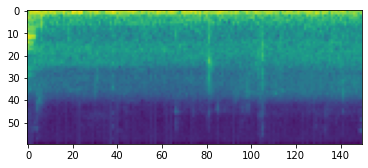

In [8]:
#Visualising spectrogram. Try listening to different clips and spotting distinctive sounds in the spectrogram
plt.imshow(spec.numpy())